# Cross-Country Comparison
# Compare solar irradiance metrics across Benin, Sierra Leone, and Togo using cleaned datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from IPython.display import display, Markdown

In [ ]:
# Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.
benin = pd.read_csv(r"C:\Users\gasha\Desktop\solar-challenge-week0\data\benin_clean.csv")
sierra_leone = pd.read_csv(r"C:\Users\gasha\Desktop\solar-challenge-week0\data\sierraleone_clean.csv")
togo = pd.read_csv(r"C:\Users\gasha\Desktop\solar-challenge-week0\data\togo_clean.csv")
# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

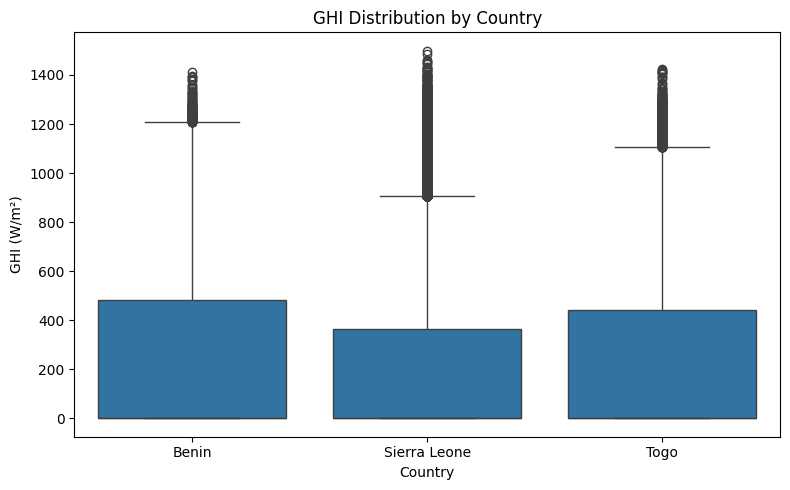

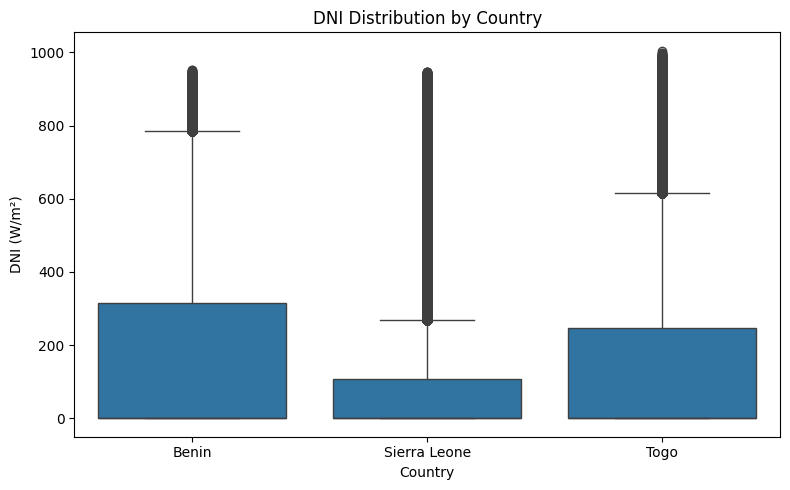

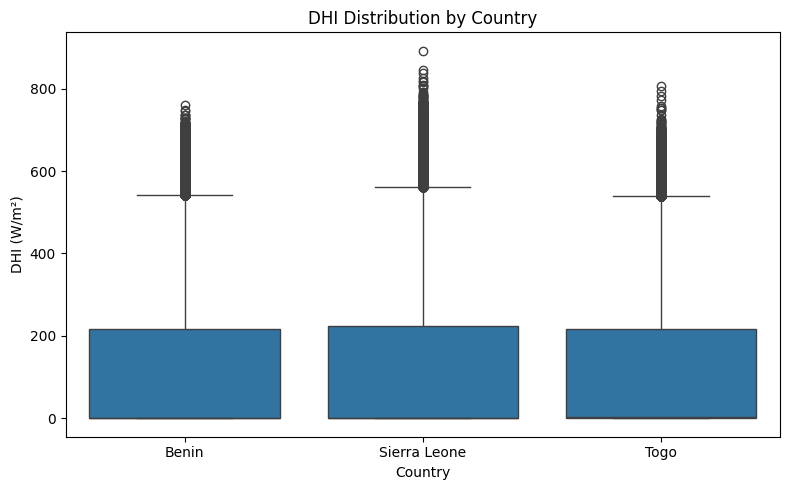

In [ ]:
# Metrics to compare using Boxplots 
metrics = ['GHI', 'DNI', 'DHI']
# Boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Country', y=metric)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.tight_layout()
    plt.show()

In [11]:
# Summary Table comparing mean, median, and standard deviation of GHI, DNI, and DHI across countries.
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
display(Markdown("Summary Table"))
display(summary)

Summary Table

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.96    1.8  330.10  167.44    0.0  261.55  116.99    1.6   
Sierra Leone  204.41    0.3  296.79  116.52    0.0  218.57  116.27    0.0   
Togo          231.72    2.1  321.69  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         157.46  
Sierra Leone  157.02  
Togo          156.52

In [12]:
# Statistical testing: ANOVA and Kruskal-Wallis for GHI
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

display(Markdown(f"**One-way ANOVA p-value for GHI:** {anova_result.pvalue:.4f}"))
display(Markdown(f"**Kruskal–Wallis p-value for GHI:** {kruskal_result.pvalue:.4f}"))

**One-way ANOVA p-value for GHI:** 0.0000

**Kruskal–Wallis p-value for GHI:** 0.0000

In [15]:
# Auto-generate 3 key observations
stats = df.groupby('Country').agg(GHI_mean=('GHI','mean'),
                                  GHI_median=('GHI','median'),
                                  GHI_std=('GHI','std'))
obs = []
obs.append(f"{stats['GHI_median'].idxmax()} shows the highest median GHI.")
obs.append(f"{stats['GHI_std'].idxmax()} has the greatest variability in GHI.")
obs.append(f"{stats['GHI_mean'].idxmax()} leads in mean GHI, reinforcing its advantage.")
for o in obs:
    print("-", o)


- Togo shows the highest median GHI.
- Benin has the greatest variability in GHI.
- Benin leads in mean GHI, reinforcing its advantage.


C:\Users\gasha\AppData\Local\Temp\ipykernel_82952\1216876852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


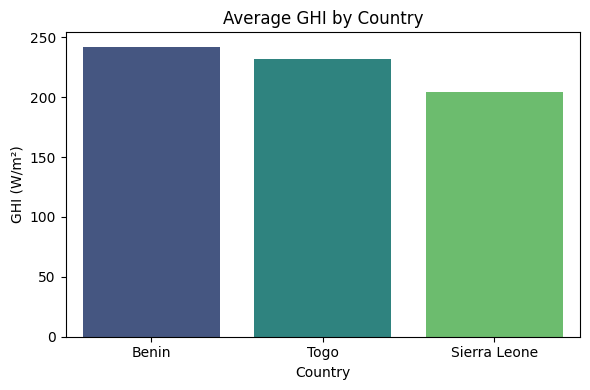

In [ ]:
# Visual Summary using Bar chart ranking countries by average GHI
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()